In [1]:
#Library Imports
import csv
import datetime as dt
import json
import os
import statistics
import time
import numpy as np
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt
from datetime import datetime
import random
from itertools import chain
import glob
import matplotlib.ticker as ticker
import seaborn as sns

In [20]:
path = 'C:\\Users\\Kristian\\Documents\\Data Science Portfolio Projects\\tftdata'
all_files = os.listdir(path)
li = []
for filename in all_files:
    df = pd.read_csv(path+'\\'+filename, index_col=None)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.drop('Unnamed: 0', axis=1)
frame = frame.drop_duplicates()
# Here the files are taken from the previous notebook and combined. Since the samples are random, duplicates need to be removed.

In [21]:
chibi = frame[frame['littlelegend'].str.contains('Chibi') == True]
# For this example analysis, I want to see if chibi avatars, the most expensive, have any correlation to win rate, and which ones have the highest win rate. Wins in 
# TFT are placements from first to eighth with first being the best. The chibi data frame sorts out chibis to compare amongst eachother.

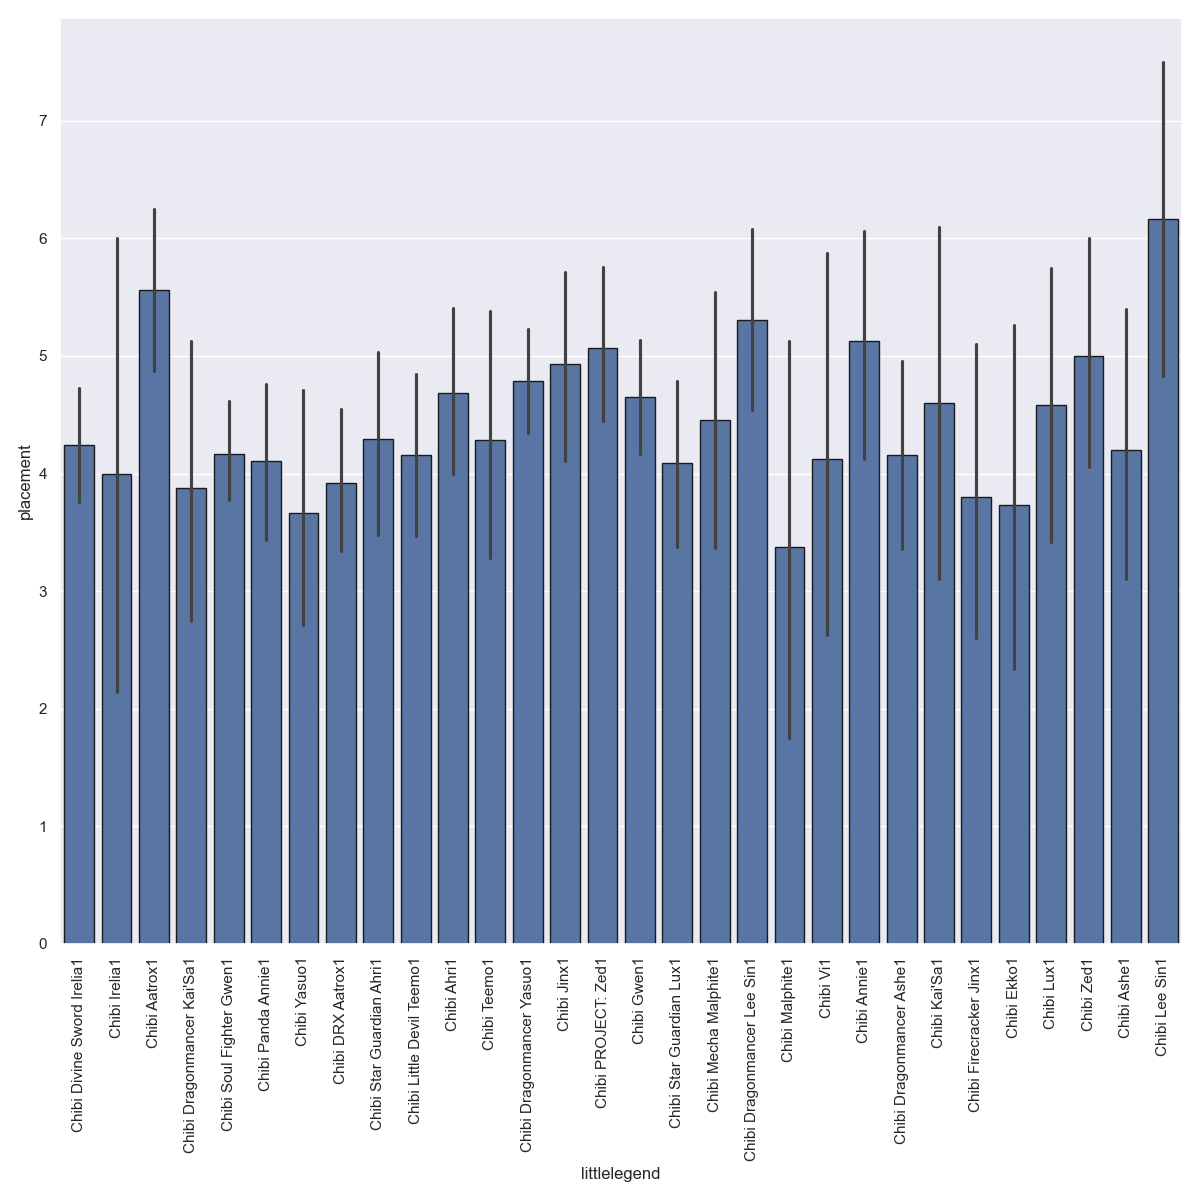

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set_theme()
sns.barplot(
    data = chibi,
    x="littlelegend", y="placement", ax=ax, ec='k', legend=False
)
ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
# Here is a plot containing all the chibi avatar's placements.

In [5]:
augmentplace = pd.DataFrame(frame)
augmentplace = frame
augmentplace['augments'] = augmentplace['augments'].str.replace('[','')    
augmentplace['augments'] = augmentplace['augments'].str.replace(']','')    
augmentplace['augments'] = augmentplace['augments'].str.replace("'",'')    
augmentplace[['augment1', 'augment2', 'augment3']] = augmentplace['augments'].str.split(',', n=2, expand=True)                                              
augmentplace['augment2'] = augmentplace['augment2'].str.strip()
augmentplace['augment3'] = augmentplace['augment3'].str.strip()

# For the other example analysis, I will do something that most TFT stats websites do, check the average placements of augments. The cell splits the augment column into three seperate columns cooresponding
# to the augments a player choses throughout the game.

In [22]:
augdata = pd.read_csv('augdata.csv')
augdict = pd.Series(augdata.name.values, index=augdata.id).to_dict()
augdicttype = pd.Series(augdata.type.values, index=augdata.name).to_dict()
# A dictionary is created to connect augment IDs to their in game name.

In [23]:
augmentplace['augment1'] = augmentplace['augment1'].map(augdict)
augmentplace['type1'] = augmentplace['augment1'].map(augdicttype)
augmentplace['augment2'] = augmentplace['augment2'].map(augdict)
augmentplace['type2'] = augmentplace['augment2'].map(augdicttype)
augmentplace['augment3'] = augmentplace['augment3'].map(augdict)
augmentplace['type3'] = augmentplace['augment3'].map(augdicttype)
# The finished data frame with both little legends and augments seperated and named.

In [12]:
augmentplace['augmentsnew'] = augmentplace.apply(lambda x:'%s_1,%s_2,%s_3' % (x['augment1'],x['augment2'],x['augment3']), axis=1)
augments = augmentplace[['augmentsnew','placement']]
augexplode = (augments.set_index(['placement'])
                    .apply(lambda x: x.str.split(',').explode())
                     .reset_index())
def label_stage(row):
    if '_1' in row['augmentsnew']:
        return 2
    elif '_2' in row['augmentsnew']:
        return 3
    else:
        return 4
    return 0
# This is the start of cleaning and organizing the augment data for easier analysis. The first three lines create a new column of list data. This column is a cleaned version of the 'augments' column.
# Augments are given a label to indicate the stage they were selected. This will be used in the funtion.
# The defined function is for assigning a new entry in each row indictating the stage the augment was selected using the added labels.

In [25]:
augexplode['stage'] = augexplode.apply(label_stage, axis=1)
augexplode['augmentsnew'] = augexplode['augmentsnew'].str.rstrip('_123')
augexplode['type'] = augexplode['augmentsnew'].map(augdicttype)
# This cell adds the stage and type for each selected augment. This newly made data set allows us to quickly and easily analyze augment placement rates.

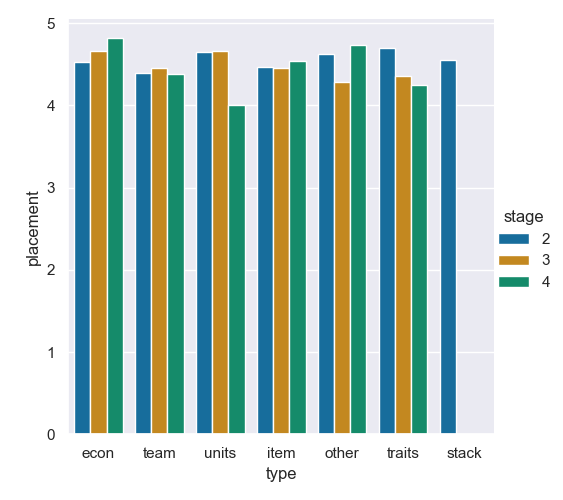

In [14]:
sns.catplot(data=augexplode, x='type', y='placement', hue='stage', errorbar = None, kind='bar', palette="colorblind")